In [9]:
import sys
sys.path.append('../../')

In [11]:
import pandas as pd
import toolbox.as_toolbox as ast
from toolbox import fits
import urllib
import matplotlib.pyplot as plt
from toolbox import vis
from scipy import stats

In [48]:
def f_prior(theta,a = 5 ,b = 17): return stats.beta.pdf(theta, a, b)
def f_lh(theta, k = 66, n = 100): return stats.binom.pmf(k, n, theta)
def f_posterior(theta): return f_prior(theta)*f_lh(theta) #no normalization so far
def f_proposal(mu = 0, sig = .3): return stats.norm.rvs(loc = mu, scale = sig)

In [51]:
def MC(post, prop, num_iter, theta0):
    Theta = np.empty(num_iter)
    theta = theta0
    for i in range(num_iter):
        theta_prop = proposal()
        rand = np.random.uniform()
        if post(theta_prop)/post(theta)>rand:
            theta = theta_prop
            Theta[i] = theta
        else:
            Theta[i] = theta
    
    return Theta

In [58]:
Theta = MC(f_posterior, f_proposal, 10000, .5)

In [85]:
np.mean(Theta[2000:]), np.std(Theta[2000:])

(0.5693896444992046, 0.042795353487660975)

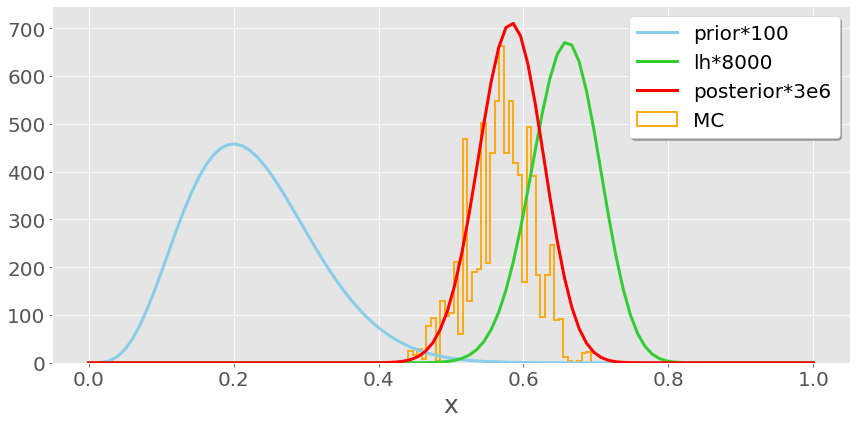

In [86]:
x, y, binwidth, fig, ax = vis.nice_histogram(Theta[2000:], 40,  plot_legend=False, show_plot=False, plot_hist=True, 
                                             data_label_hist= 'MC')
theta_x = np.linspace(0,1,100)
ax, fig = vis.nice_plot(theta_x, 100*f_prior(theta_x), axis = ax, figure = fig, data_label='prior*100')
ax, fig = vis.nice_plot(theta_x, 8000*f_lh(theta_x), axis = ax, figure = fig, data_label='lh*8000', color = 'limegreen')
ax, fig = vis.nice_plot(theta_x, 3e6*f_posterior(theta_x), axis = ax, figure = fig, 
                        data_label='posterior*3e6', color = 'r')
fig